<a href="https://colab.research.google.com/github/sunjinnn/Blockchain2025/blob/main/25_09_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0
1.0
[0]
[1]
1.0
1.0


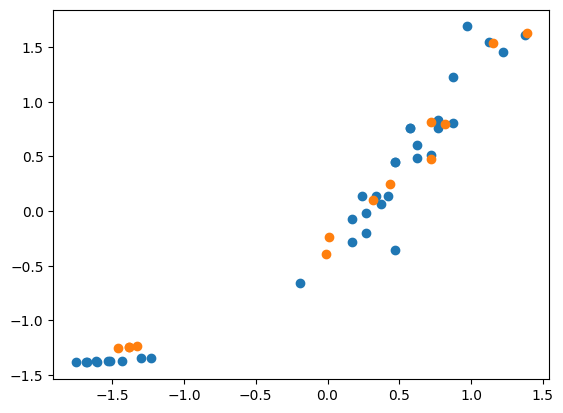

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#추가 - 배열을 비율에 맞게 훈련데이터와 테스트 데이터로 나누어줌
from sklearn.model_selection import train_test_split

kn = KNeighborsClassifier(n_neighbors=5)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target=[1]*35 + [0]*14

# 추가
# train_input = fish_data[:35]
# train_target = fish_target[:35]
# test_input = fish_data[35:]
# test_target = fish_target[35:]

#추가(데이터가 편향되지 않게 하는법)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# 비율은 75% 25%로 나눔
# "stratify=fish_target": 나누는 기준을 타켓을 보고 해라, 35개 대 15개 비율로 데이터를 가져옴, seed를 42로 고정해서 학습동안 같은 데이터를 가져옴


kn.fit(train_input, train_target)#훈련에 쓰이는 데이터
print(kn.score(test_input, test_target))#테스트에 쓰이는 데이터, score는 정확도
print(kn.score(train_input, train_target))
# 돔만 가지고 학습해서 빙어에 대한 데이터를 입력하면 0이 나옴, 학습 데이터가 편향되지 않게
print(kn.predict([[25, 150]]))

# print(kn.predict([[30, 600]]))
# print(kn.predict([[10, 60]]))

# plt.scatter(fish_length, fish_weight, marker='^')
# plt.scatter(25, 150, marker='*')
# #결과가 빙어로 나옴 => 길이랑 무게를 같은 척도로 평가 가능하지 않음, x축의 비율을 늘려주기


# plt.xlabel('length')
# plt.ylabel('weight')
# plt.xlim((0,1000))
# plt.show()

# 자동으로 두 특성의 스케일을 맞춰주는 표준점수를 사용할 것임
# (특성값-평균)/표준편차로 나눠줌 : 표준편차는 평균에서 떨어진 정도 = 비율이 나옴
# 스케일링 : 특성값을 표준점수로 변환

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input -mean)/std # 범위 변환 완료
kn.fit(train_scaled, train_target)
new=([25, 150] - mean) /std # 똑같이 연산처리 해줘야함
print(kn.predict([new])) # 돔이라고 나옴

mean = np.mean(test_input, axis=0)
std = np.std(test_input, axis=0)
test_scaled = (test_input -mean)/std # 범위 변환 완료


# 이제 테스트 데이터로 확인해보기 위해 테스트 데이터를 스케일링 하는 걸 해볼것

# 스케일된 데이터의 산점도 확인
# 9월 23일(화) 3주차 - 1

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(test_scaled[:,0], test_scaled[:,1])


kn.fit(train_scaled, train_target)#훈련에 쓰이는 데이터
print(kn.score(test_scaled, test_target))#테스트에 쓰이는 데이터, score는 정확도
print(kn.score(train_scaled, train_target))

9/18

처음 스코어는 0.0 그 다음 스코어는 1.0 => 이게 바로 정확도

훈련세트: 훈련(학습)에 사용되는 데이터
테스트세트: 평가에 사용되는 데이터
샘플링 편향: 훈련세트에 샘플이 골고루 섞이지 않는 경우
-데이터가 많이 있을 때 적절한 분포를 가지고 들어와야 하는데

적절한 비율로 돔과 빙어 데이터를 가지고 학습을 하고 테스트를 해야 적당한 거임

데이터편향 !! 윤리적인 판단이 필요한 부분이다

훈련을 75% 테스트를 25%로 나눠서 진행 (49개의 데이터 중)
나눌 때 무슨 기준으로 나누지?
-> 타겟이 잘 섞이도록 75% 안에 빙어와 돔이 들어가야하는데 34:15의 비율로 들어가게 됨. (타겟을 가지고 기준을 정해라 라고 했으니까)
fish_target대로 데이터를 가져오자?

어떤 수를 리턴하는 알고리즘에서 같은 숫자가 나오는데 '초'를 넣게되면 훈련셋을 예시로 35:14의 비율로 항상 다른 걸 들고와서 다른 결과가 나옴 그래서 고정을 해버리면 학습데이터는 항상 같은 데이터를 가져오기 때문에 공부하기가 편하다 random_stat=42

1g과 1cm에 대해 두 개의 차이를 확실히 잡아줘야할 거 같은?

두 특성의 스케일과 데이터를 표현하는 기준이 다르다

아놔 표준점수?? = (특성값-평균)/표준편차

train_input, test_input만 스케일링하면 된다?

스케일링 전에는 빙어였는데 스케일링 후에는 돔이었다

스케일링된 데이터의 산점도를 구해보거라 (9.23)

[행, 열]
[length, weight]
train_scaled[1, 1] = 1행 1열
[1:2, 0] = 1,2행의 0열
[:,0] 0 열의 모든 행
plt.scateer(train_scaled[:, 0], train_scaled[:,1])
tast 트레일드된 데이터도 함께 찍어보기

테스트데이터를 스케일링했음 평균을 빼고 std에 넣어둿으니 테스트데이터도 똑같이 스케일링해서 표준편차를 구하고 산점도를 찍어라

<기말 발표 때>

정확도와 표준편차를 보여주세요
몇 대 몇으로 했습니다 라고 말해야 하는 정도